In [83]:
#imports 
import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.nn import functional as F

In [84]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(f'Estamos usando: {device}')



Estamos usando: cpu


## Supernova parametric model (SPM)

Existen 4 tipos de supernovas: SNIbc, SNIa, SNII, SLSN

In [85]:
def SPM(t, A, t_0, t_1, B, t_rise, t_fall):
    gamma = (t_1 - t_0)
    s = 0.2
    F = []
    
    for t_i in t:
        # g(t)
        arg = s*(t_i-(gamma+t_0))
        g = 1/(1 + np.exp(- arg))
        
        # F_early and F_late
        x_early = A*(1-B*((t_i-t_0)/gamma))
        x_late = (A*(1-B)*np.exp(gamma/t_fall))
        y = (1+np.exp(-(t_i-t_0)/t_rise))
        
        F_early = x_early/y
        F_late = x_late/y
        
        #F_sne
        F_i = F_early*(1-g) + F_late*g
        F.append(F_i)
        
    return torch.FloatTensor(F)

In [86]:
# parameters

#Amplitud: cerca de 20
#t0: timpo inicial
#t_1: tiempo en que empieza a transisionar la SN
#gamma: controls the time duration of the SN-plateau region
#beta: controls the slope of the SN-plateau region (pendiente)
#t_rise: controls the required time to reach the maximum brightness along the light-curve
#t_fall: controls the brightness decay time along and after the SN-plateau region

A = 10
t_0 = 58600
t_1 = 58640
B = 0.8
t_rise = 10
t_fall = 50


100


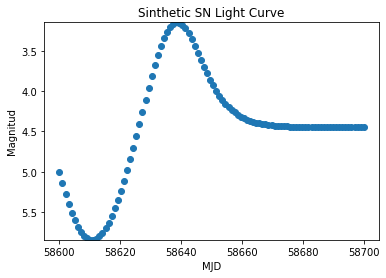

In [87]:
t = np.linspace(58600,58700,100)
F = SPM(t, A, t_0, t_1, B, t_rise, t_fall)
print(len(F))

plt.plot(t, F, 'o')
plt.title("Sinthetic SN Light Curve")
plt.xlabel("MJD")
plt.ylabel("Magnitud")
plt.ylim(max(F),min(F))
plt.show()

In [88]:
import random
x = np.random.normal(loc=0.0, scale=1.0, size=None)
x


1.599539352250645

In [89]:
As = np.random.randint(20, 50, 100)
#t_0 = np.random.randint(58500, 58600, 100)
#t_1 = np.random.randint(58600, 58700, 100)
Bs = np.random.rand(100)
#t_rise = np.random.randint(20, 30, 100)
#t_fall = np.random.randint(40, 60, 100)
    


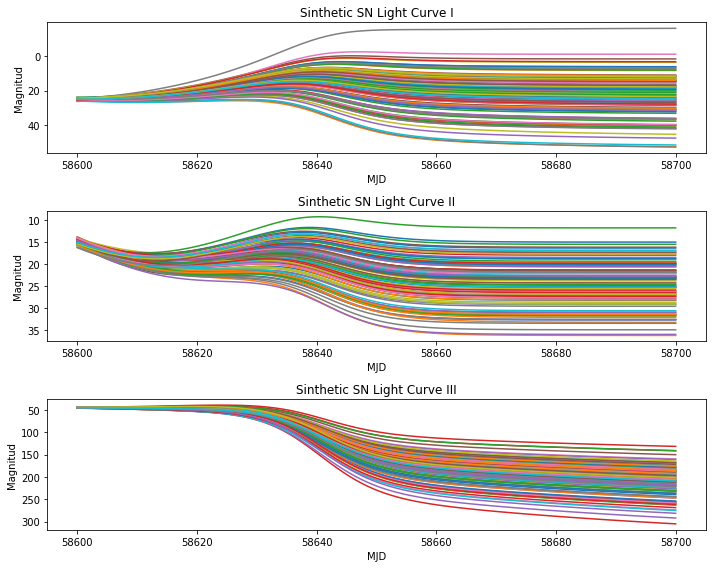

In [90]:
LC_1 = []
LC_2 = []
LC_3 = []

t = np.linspace(58600,58700,100)
fig, ax = plt.subplots(3, 1, figsize=(10,8))



for i in range(100):
    A_1 = np.random.normal(loc=50, scale=1.0, size=None)
    B_1 = np.random.normal(loc=0.8, scale=0.1, size=None)
    t_rise_1 = np.random.normal(loc=25, scale=1.0, size=None)
    t_fall_1 = np.random.normal(loc=50, scale=2.0, size=None)
    LC_1.append(SPM(t, A_1, t_0, t_1, B_1, t_rise_1, t_fall_1))
    
    
    
    A_2 = np.random.normal(loc=30, scale=1.0, size=None)
    B_2 = np.random.normal(loc=0.5, scale=0.1, size=None)
    t_rise_2 = np.random.normal(loc=10, scale=1.0, size=None)
    t_fall_2 = np.random.normal(loc=80, scale=2.0, size=None)
    LC_2.append(SPM(t, A_2, t_0, t_1, B_2, t_rise_2, t_fall_2))
    
    
    A_3 = np.random.normal(loc=90, scale=1.0, size=None)
    B_3 = np.random.normal(loc=0.3, scale=0.1, size=None)
    t_rise_3 = np.random.normal(loc=50, scale=1.0, size=None)
    t_fall_3 = np.random.normal(loc=30, scale=2.0, size=None)
    LC_3.append(SPM(t, A_3, t_0, t_1, B_3, t_rise_3, t_fall_3))

    ax[0].plot(t, LC_1[i])
    ax[1].plot(t, LC_2[i])
    ax[2].plot(t, LC_3[i])

ax[0].set_title("Sinthetic SN Light Curve I")
ax[0].set_xlabel("MJD")
ax[0].set_ylabel("Magnitud")

ax[1].set_title("Sinthetic SN Light Curve II")
ax[1].set_xlabel("MJD")
ax[1].set_ylabel("Magnitud")

ax[2].set_title("Sinthetic SN Light Curve III")
ax[2].set_xlabel("MJD")
ax[2].set_ylabel("Magnitud")

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[2].invert_yaxis()

fig.tight_layout()
plt.show()

In [91]:
tensor_LC_1 = torch.stack(LC_1)
print('Shape LC_1: ',tensor_LC_1.shape)

labels_LC_1 = torch.zeros(100)
print('Shape Labels LC_1: ',labels_LC_1.shape)

tensor_LC_2 = torch.stack(LC_2)
print('Shape LC_2: ',tensor_LC_2.shape)

labels_LC_2 = torch.ones(100)
print('Shape Labels LC_2: ',labels_LC_2.shape)

tensor_LC_3 = torch.stack(LC_3)
print('Shape LC_3: ',tensor_LC_3.shape)

labels_LC_3 = 2*torch.ones(100)
print('Shape Labels LC_3: ',labels_LC_3.shape)


Shape LC_1:  torch.Size([100, 100])
Shape Labels LC_1:  torch.Size([100])
Shape LC_2:  torch.Size([100, 100])
Shape Labels LC_2:  torch.Size([100])
Shape LC_3:  torch.Size([100, 100])
Shape Labels LC_3:  torch.Size([100])


In [92]:
x_train_tensor = torch.cat((tensor_LC_1, tensor_LC_2, tensor_LC_3))
y_train_tensor = torch.cat((labels_LC_1, labels_LC_2, labels_LC_3))
print(x_train_tensor.shape)
print(y_train_tensor.shape)

torch.Size([300, 100])
torch.Size([300])


## Create Minibatches

In [93]:
def create_minibatches(x, y, mb_size, shuffle = True):
    '''
    x  #muestras, 784
    y #muestras, 1
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]
    if shuffle: 
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]  
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

## Accuracy

In [94]:
def accuracy(model, x, y, mb_size):
    num_correct = 0
    num_total = 0
    model.eval()
    model = model.to(device=device)
    with torch.no_grad():
        for (xi, yi) in create_minibatches(x, y, mb_size):
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)
            scores = model(xi) # mb_size, 10
            _, pred = scores.max(dim=1) #pred shape (mb_size )
            num_correct += (pred == yi.squeeze()).sum() # pred shape (mb_size), yi shape (mb_size, 1)
            num_total += pred.size(0)

            return float(num_correct)/num_total     

## Training Loop

In [184]:
def train(model, optimiser, x_train_tensor, y_train_tensor, mb_size, epochs=100):
    #model = model.to(device=device)
    for epoch in range(epochs):
        for (xi, yi) in create_minibatches(x_train_tensor, y_train_tensor, mb_size):
            model.train()
            #xi = xi.to(device=device, dtype=torch.float32)
            #yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)
            if epoch==99:
                print(scores.shape)
                print(scores) 
                
            #print('y: ', yi.shape)####error
            #print('scores: ', scores.shape)
            yi = yi.type(torch.LongTensor)
            # funcion cost
            cost = torch.nn.functional.cross_entropy(input= scores, target=yi)
            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

            
        print(f'Epoch: {epoch}, loss: {cost.item()}, accuracy: {accuracy(model, x_train_tensor, y_train_tensor, mb_size)}')
        

## Custom Layer

In [185]:
class TimeFILM(nn.Module):
    def __init__(self, size_in, M): #size_in sería 128 o L x 128????
        super().__init__()
        self.size_in= size_in
        #self.t = t
        self.M = M
        self.T = torch.Tensor(size_in)
        a = torch.Tensor(M, size_in)
        b = torch.Tensor(M, size_in)
        v = torch.Tensor(M, size_in)
        w = torch.Tensor(M, size_in)
        self.a = nn.Parameter(a)  # nn.Parameter is a Tensor that's a module parameter.
        self.b = nn.Parameter(b)
        self.v = nn.Parameter(v)
        self.w = nn.Parameter(w)
     
        # initialize weights and biases
        torch.nn.init.normal_(self.a, mean=0.0, std=1.0)
        torch.nn.init.normal_(self.b, mean=0.0, std=1.0)
        torch.nn.init.normal_(self.v, mean=0.0, std=1.0)
        torch.nn.init.normal_(self.w, mean=0.0, std=1.0)
        
        
    def forward(self, x):
        gamma = 0
        beta = 0
        for m in range(1,self.M+1):
            gamma = gamma + self.a[m-1]*torch.sin((2*np.pi*m)*self.T/(1.5*len(self.T))) + self.b[m-1]*torch.cos((2*np.pi*m)*self.T/(1.5*len(self.T)))
            beta = beta +   self.v[m-1]*torch.sin((2*np.pi*m)*self.T/(1.5*len(self.T))) + self.w[m-1]*torch.cos((2*np.pi*m)*self.T/(1.5*len(self.T)))
        
        out = gamma*x + beta
        x_out = torch.tanh(out)
        return x_out



## Serial Encoder

In [186]:
class SerialEncoder(nn.Module):
    def __init__(self, embed_size, M):
        super(SerialEncoder, self).__init__()
        self.M = M
        self.embed_size = embed_size # D = 128
        self.fc1 = nn.Linear(1, self.embed_size, bias=False)  
        self.TimeFILM = TimeFILM(self.embed_size, self.M)                        
        self.fc2 = nn.Linear(self.embed_size, self.embed_size) 
        self.relu = nn.ReLU()
        self.MultiHeadAttention = nn.MultiheadAttention(self.embed_size, 4, batch_first=True)
    
    def forward(self, x):    
        #x = x.view(x.size(0), -1)
        x = x[:, :, None]
        #print(x.shape)
        out = self.fc1(x)
        #print(out.shape)
        out = self.TimeFILM(out)
        out = self.fc2(out)
        #print(out.shape)
        out = self.relu(out)
        #print(out.shape)
        attn_output, attn_output_weights = self.MultiHeadAttention(out, out, out)
        #print(attn_output.shape)
        #print(attn_output[:,-1,:].shape)
        return out[:,-1,:]

In [188]:
#Instanciar modelo
embed_size = 128 
M = 5
L = 100
lr = 5e-2
epochs = 100
mb_size = 20

encoder = SerialEncoder(embed_size, M)

optimizer = torch.optim.SGD(encoder.parameters(), lr=lr)
train(encoder, optimizer, x_train_tensor, y_train_tensor, mb_size, epochs)

Epoch: 0, loss: 3.703792095184326, accuracy: 0.3
Epoch: 1, loss: 4.090889930725098, accuracy: 0.4
Epoch: 2, loss: 3.0363261699676514, accuracy: 0.3
Epoch: 3, loss: 2.7645745277404785, accuracy: 0.35
Epoch: 4, loss: 1.891937494277954, accuracy: 0.5
Epoch: 5, loss: 2.3737778663635254, accuracy: 0.4
Epoch: 6, loss: 2.5132155418395996, accuracy: 0.45
Epoch: 7, loss: 3.246189594268799, accuracy: 0.3
Epoch: 8, loss: 1.9801628589630127, accuracy: 0.45
Epoch: 9, loss: 3.4108357429504395, accuracy: 0.35
Epoch: 10, loss: 2.520651340484619, accuracy: 0.55
Epoch: 11, loss: 3.097628116607666, accuracy: 0.3
Epoch: 12, loss: 2.5318596363067627, accuracy: 0.3
Epoch: 13, loss: 2.373450756072998, accuracy: 0.5
Epoch: 14, loss: 2.764380931854248, accuracy: 0.25
Epoch: 15, loss: 2.645521879196167, accuracy: 0.35
Epoch: 16, loss: 1.5456199645996094, accuracy: 0.4
Epoch: 17, loss: 1.90521240234375, accuracy: 0.3
Epoch: 18, loss: 2.1474270820617676, accuracy: 0.55
Epoch: 19, loss: 2.4329745769500732, accurac

In [ ]:
rf =BalancedRandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=100,
    max_features='sqrt',
    n_jobs=-1,
    class_weight='balanced'
)